In [23]:
import zipfile

# Path to the uploaded zip file
zip_file = '/content/homer_bart.zip'

# Step 1: Unzip the uploaded file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('/content/homer_bart')

# Step 2: Verify the contents
extracted_path = '/content/homer_bart'
contents = os.listdir(extracted_path)
contents




['Homer', 'Bart']

In [24]:
import os

# Path to the extracted folders
extracted_path = '/content/homer_bart'

# Initialize counters
num_homer_images = 0
num_bart_images = 0

# Iterate through each label (subfolder)
for label in os.listdir(extracted_path):
    label_path = os.path.join(extracted_path, label)
    if os.path.isdir(label_path):
        num_images = len(os.listdir(label_path))
        if label.lower() == 'homer':
            num_homer_images += num_images
        elif label.lower() == 'bart':
            num_bart_images += num_images

# Print the number of images in each category
print(f"Number of images in 'Homer': {num_homer_images}")
print(f"Number of images in 'Bart': {num_bart_images}")


Number of images in 'Homer': 109
Number of images in 'Bart': 160


Epoch 1/50
7/7 [==============================] - 3s 119ms/step - loss: 0.7034 - accuracy: 0.6476 - val_loss: 1.9662 - val_accuracy: 0.3704
Epoch 2/50
7/7 [==============================] - 1s 85ms/step - loss: 0.5855 - accuracy: 0.7333 - val_loss: 1.0267 - val_accuracy: 0.4444
Epoch 3/50
7/7 [==============================] - 1s 82ms/step - loss: 0.6108 - accuracy: 0.6571 - val_loss: 0.5570 - val_accuracy: 0.7037
Epoch 4/50
7/7 [==============================] - 1s 91ms/step - loss: 0.6043 - accuracy: 0.6619 - val_loss: 0.5000 - val_accuracy: 0.6667
Epoch 5/50
7/7 [==============================] - 1s 80ms/step - loss: 0.5534 - accuracy: 0.7286 - val_loss: 0.4443 - val_accuracy: 0.7778
Epoch 6/50
7/7 [==============================] - 1s 83ms/step - loss: 0.5536 - accuracy: 0.7238 - val_loss: 0.3940 - val_accuracy: 0.8889
Epoch 7/50
7/7 [==============================] - 1s 91ms/step - loss: 0.5051 - accuracy: 0.7619 - val_loss: 0.3673 - val_accuracy: 0.8889
Epoch 8/50
7/7 [==========

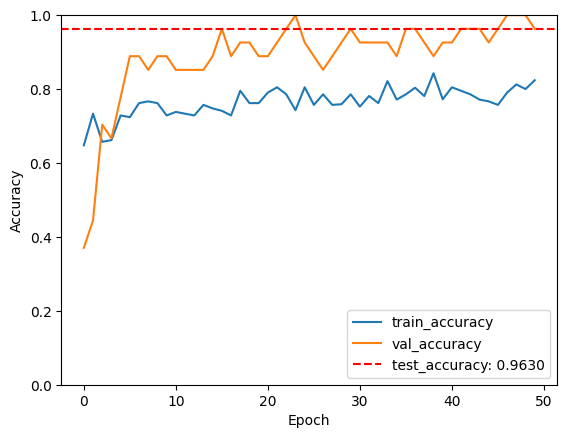

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Preprocess the images
def preprocess_images(image_folder, img_size=(64, 64)):
    images = []
    labels = []
    for label in os.listdir(image_folder):
        label_path = os.path.join(image_folder, label)
        if os.path.isdir(label_path):
            for image_file in os.listdir(label_path):
                image_path = os.path.join(label_path, image_file)
                image = load_img(image_path, target_size=img_size)
                image_array = img_to_array(image) / 255.0  # Normalize pixel values
                images.append(image_array)
                labels.append(0 if label == 'Homer' else 1)  # 'Homer' is class 0, 'Bart' is class 1

    images = np.array(images)
    labels = np.array(labels)
    return images, labels

image_folder = '/content/homer_bart'
images, labels = preprocess_images(image_folder)

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.1, random_state=42)

# Data augmentation for training images
datagen_train = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data augmentation for test images (only normalization)
datagen_test = ImageDataGenerator()

# Build the neural network model
model = Sequential([
    Flatten(input_shape=(64, 64, 3)),
    BatchNormalization(momentum=0.9, epsilon=1e-5, scale=True, center=True),
    Dropout(0.2),
    Dense(128, activation='relu'),
    BatchNormalization(momentum=0.9, epsilon=1e-5, scale=True, center=True),
    Dropout(0.2),
    Dense(64, activation='relu'),
    BatchNormalization(momentum=0.9, epsilon=1e-5, scale=True, center=True),
    Dense(32, activation='relu'),
    # Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with data augmentation
batch_size = 32
train_generator = datagen_train.flow(train_images, train_labels, batch_size=batch_size)
steps_per_epoch = train_images.shape[0] // batch_size

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=50,
    validation_data=(datagen_test.flow(test_images, test_labels)),
    verbose=1
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(datagen_test.flow(test_images, test_labels))
print(f'Test accuracy: {test_accuracy:.4f}')

# Plot training and validation accuracy, and a horizontal line for the final test accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label=f'test_accuracy: {test_accuracy:.4f}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
